In [2]:
pip install tensorflow numpy matplotlib

In [45]:
import tensorflow as tf
import os
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,Dropout,Bidirectional,GRU


In [4]:
path = kagglehub.dataset_download("kewagbln/shakespeareonline")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/kewagbln/shakespeareonline/versions/1


In [5]:
dataset_path="/root/.cache/kagglehub/datasets/kewagbln/shakespeareonline/versions/1"

contents = os.listdir(dataset_path)
print(contents)

['t8.shakespeare.txt']


In [6]:
text=open('/root/.cache/kagglehub/datasets/kewagbln/shakespeareonline/versions/1/t8.shakespeare.txt',mode='r').read()
print('Length of text: {} characters',len(text))


Length of text: {} characters 5458199


In [7]:
#print first 300 words
print(text[:300])

This is the 100th Etext file presented by Project Gutenberg, and
is presented in cooperation with World Library, Inc., from their
Library of the Future and Shakespeare CDROMS.  Project Gutenberg
often releases Etexts that are NOT placed in the Public Domain!!

Shakespeare

*This Etext has certain co


In [8]:
#find the unique character
vocab=sorted(set(text))
print("unique characterss:",len(vocab))
print("vocab:",vocab)

unique characterss: 91
vocab: ['\n', ' ', '!', '"', '#', '%', '&', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '|', '}', '~']


In [9]:
#mapping char to int
char_to_idx = {char: idx for idx, char in enumerate(vocab)}
idx_to_char = {idx: char for idx, char in enumerate(vocab)}

In [10]:
char_to_idx,idx_to_char

({'\n': 0,
  ' ': 1,
  '!': 2,
  '"': 3,
  '#': 4,
  '%': 5,
  '&': 6,
  "'": 7,
  '(': 8,
  ')': 9,
  '*': 10,
  ',': 11,
  '-': 12,
  '.': 13,
  '/': 14,
  '0': 15,
  '1': 16,
  '2': 17,
  '3': 18,
  '4': 19,
  '5': 20,
  '6': 21,
  '7': 22,
  '8': 23,
  '9': 24,
  ':': 25,
  ';': 26,
  '<': 27,
  '=': 28,
  '>': 29,
  '?': 30,
  '@': 31,
  'A': 32,
  'B': 33,
  'C': 34,
  'D': 35,
  'E': 36,
  'F': 37,
  'G': 38,
  'H': 39,
  'I': 40,
  'J': 41,
  'K': 42,
  'L': 43,
  'M': 44,
  'N': 45,
  'O': 46,
  'P': 47,
  'Q': 48,
  'R': 49,
  'S': 50,
  'T': 51,
  'U': 52,
  'V': 53,
  'W': 54,
  'X': 55,
  'Y': 56,
  'Z': 57,
  '[': 58,
  ']': 59,
  '_': 60,
  '`': 61,
  'a': 62,
  'b': 63,
  'c': 64,
  'd': 65,
  'e': 66,
  'f': 67,
  'g': 68,
  'h': 69,
  'i': 70,
  'j': 71,
  'k': 72,
  'l': 73,
  'm': 74,
  'n': 75,
  'o': 76,
  'p': 77,
  'q': 78,
  'r': 79,
  's': 80,
  't': 81,
  'u': 82,
  'v': 83,
  'w': 84,
  'x': 85,
  'y': 86,
  'z': 87,
  '|': 88,
  '}': 89,
  '~': 90},
 {0: '\

convert text into int sequence

In [11]:
text_int=np.array([char_to_idx[char] for char in text])

In [12]:
text_int

array([51, 69, 70, ...,  0,  0,  0])

create training data

In [13]:
seq_length=100
seq=[]
next_char=[]

In [14]:
for i in range(len(text)-seq_length):
  seq.append(text_int[i:i+seq_length])
  next_char.append(text_int[i+seq_length])

In [15]:
X=np.array(seq)
y=np.array(next_char)

In [16]:
X=X[:50000]
y=y[:50000]


In [17]:
model=Sequential([
    Embedding(len(vocab),256,input_length=seq_length),
    LSTM(128,return_sequences=True),
    Dropout(0.2),
    LSTM(128),
    Dense(len(vocab),activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [20]:
model.compile('adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [38]:
history=model.fit(X,y,epochs=15,batch_size=16)

Epoch 1/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 52s 17ms/step - accuracy: 0.6829 - loss: 0.9933
Epoch 2/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.6898 - loss: 0.9801
Epoch 3/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 81s 17ms/step - accuracy: 0.6859 - loss: 0.9868
Epoch 4/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.6965 - loss: 0.9479
Epoch 5/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 51s 16ms/step - accuracy: 0.6969 - loss: 0.9538
Epoch 6/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 84s 17ms/step - accuracy: 0.7007 - loss: 0.9324
Epoch 7/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 81s 16ms/step - accuracy: 0.7022 - loss: 0.9232
Epoch 8/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.7025 - loss: 0.9209
Epoch 9/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.7034 - loss: 0.9127
Epoch 10/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.7014 - loss: 0.9217
Epoch 11/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 52s 17ms/step - accuracy: 0.7042 - loss: 0.9162
Epoch 12

In [40]:
def generate_text(model,seed_text,num_generate=400):
  input_eval=[char_to_idx[char] for char in seed_text]
  input_eval=pad_sequences(input_eval,maxlen=seq_length,truncating='pre')
  text_generated=[]


In [41]:
def generate_text(model,seed_text,num_generate=400):
  input_eval=[char_to_idx[char] for char in seed_text]
  input_eval = np.array(input_eval).reshape(1, -1)

  input_eval=pad_sequences(input_eval,maxlen=seq_length,truncating='pre')

  text_generated=[]
  for _ in range(num_generate):
    predictions=model.predict(input_eval)
    predicted_id=np.random.choice(len(vocab),p=predictions[0])

    text_generated.append(idx_to_char[predicted_id])

    input_eval=np.roll(input_eval,-1,axis=1)
    input_eval[0,-1]=predicted_id
  return seed_text+"".join(text_generated)

In [50]:
seed = "To be or not to be, that is the"
generated_text = generate_text(model, seed_text=seed)
print("Generated Shakespeare Text:\n")
print(generated_text)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━

using bidirectional lstm

In [28]:
model=Sequential([
    Embedding(len(vocab),256,input_length=seq_length),
    Bidirectional(LSTM(128,return_sequences=True)),
    Dropout(0.2),
    LSTM(128),
    Dense(len(vocab),activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [34]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [35]:
h=model.fit(X,y,epochs=20,batch_size=16)

Epoch 1/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 55s 17ms/step - accuracy: 0.3383 - loss: 2.3968
Epoch 2/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.4360 - loss: 1.9477
Epoch 3/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 53s 17ms/step - accuracy: 0.4870 - loss: 1.7493
Epoch 4/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 81s 17ms/step - accuracy: 0.5223 - loss: 1.6174
Epoch 5/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.5379 - loss: 1.5372
Epoch 6/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.5639 - loss: 1.4604
Epoch 7/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.5739 - loss: 1.4032
Epoch 8/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.5883 - loss: 1.3464
Epoch 9/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.6027 - loss: 1.2958
Epoch 10/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 83s 17ms/step - accuracy: 0.6059 - loss: 1.2670
Epoch 11/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 81s 17ms/step - accuracy: 0.6179 - loss: 1.2322
Epoch 12

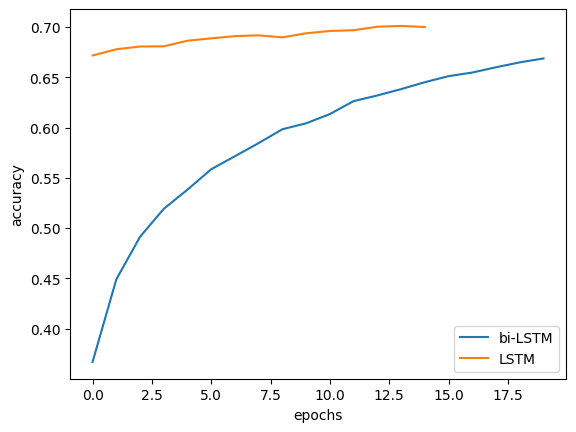

In [44]:
plt.plot(h.history['accuracy'],label="bi-LSTM")
plt.plot(history.history['accuracy'],label='LSTM')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

using GRU

In [46]:
model = Sequential([
    Embedding(input_dim=len(vocab), output_dim=256, input_length=seq_length),
    Bidirectional(GRU(128, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(GRU(128)),
    Dense(len(vocab), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [48]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [49]:
hist=model.fit(X,y,epochs=15,batch_size=16)

Epoch 1/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 71s 21ms/step - accuracy: 0.3197 - loss: 2.5585
Epoch 2/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 79s 21ms/step - accuracy: 0.4600 - loss: 1.8607
Epoch 3/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 83s 21ms/step - accuracy: 0.5015 - loss: 1.6786
Epoch 4/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 81s 21ms/step - accuracy: 0.5360 - loss: 1.5445
Epoch 5/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 82s 21ms/step - accuracy: 0.5665 - loss: 1.4253
Epoch 6/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 64s 20ms/step - accuracy: 0.5887 - loss: 1.3395
Epoch 7/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 85s 21ms/step - accuracy: 0.6053 - loss: 1.2603
Epoch 8/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 80s 21ms/step - accuracy: 0.6249 - loss: 1.1993
Epoch 9/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 82s 21ms/step - accuracy: 0.6451 - loss: 1.1348
Epoch 10/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 83s 21ms/step - accuracy: 0.6510 - loss: 1.0998
Epoch 11/15
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 81s 21ms/step - accuracy: 0.6564 - loss: 1.0825
Epoch 12

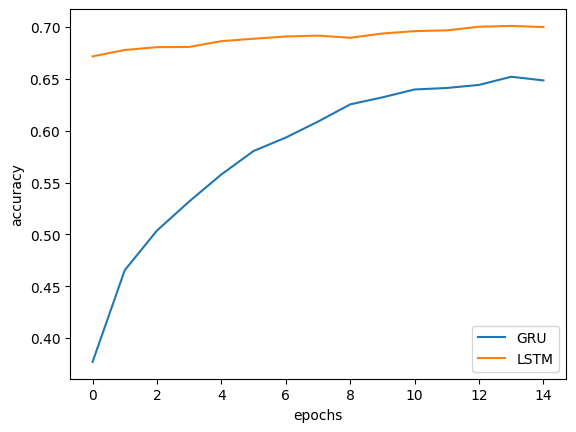

In [51]:
plt.plot(hist.history['accuracy'],label="GRU")
plt.plot(history.history['accuracy'],label='LSTM')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()